In [1]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('all lib imported')


all lib imported


In [2]:
# load the data
data=pd.read_csv('https://raw.githubusercontent.com/shawnkan/Simplilearn/main/ML/advertising_1705117480005.csv',index_col='Unnamed: 0')
print('data imported')


data imported


In [3]:
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
# missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Assumption of Linear Regression

1. Linearity

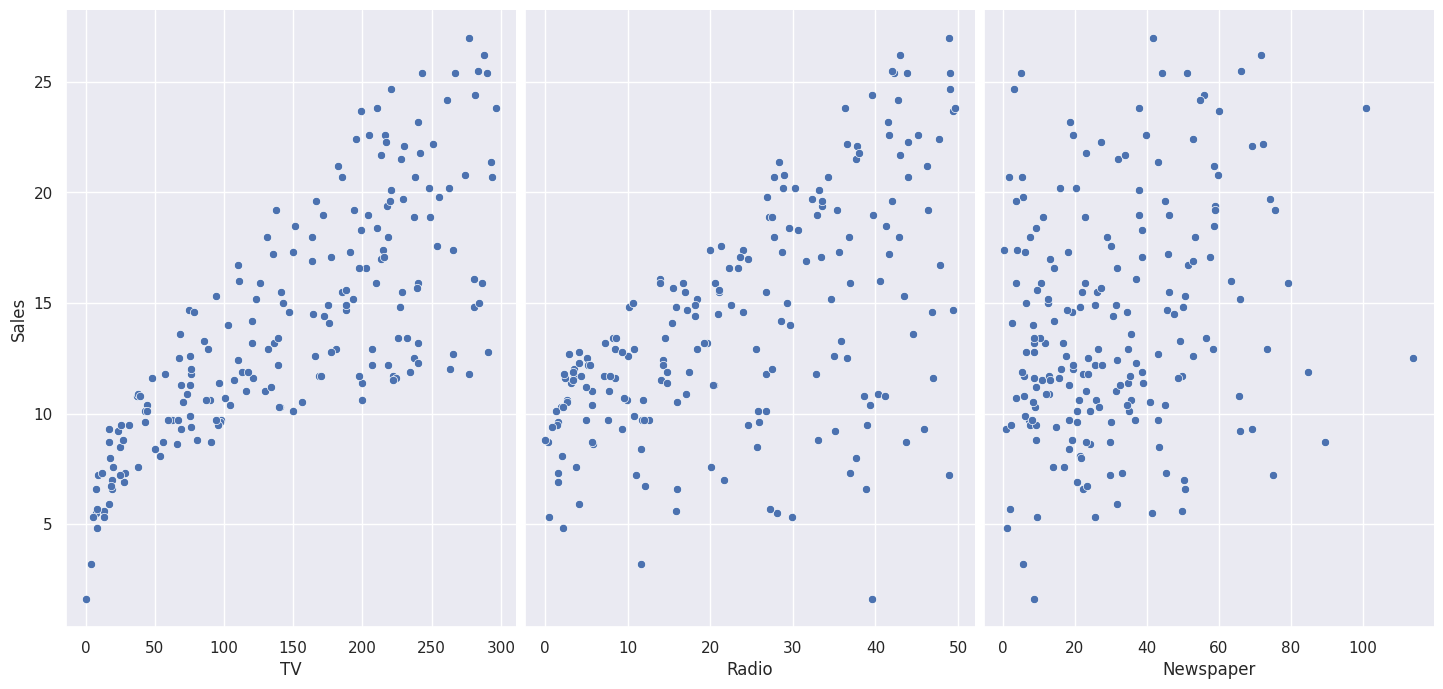

In [5]:
sns.set(style='darkgrid')

#Visualise the relationship with target var
sns.pairplot(data, x_vars=['TV','Radio', 'Newspaper'] , y_vars='Sales',height=7, aspect=0.7)
plt.show()

In [6]:
#TV & Radio have linearity with sales better than NP. LR may not be the best model

2. Fit the model

In [7]:
X = data.iloc[:,:-1]
y= data.iloc[:,-1]

In [8]:
#apply scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [10]:
#apply lr
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [11]:
# evaluate
from sklearn.metrics import mean_squared_error, r2_score
print('mse', mean_squared_error(y_test,y_pred))
print('r2 score', r2_score(y_test,y_pred))

mse 2.8800237300941918
r2 score 0.8935163320163658


In [12]:
y_pred_train = lr.predict(X_train)
print('r2 score', r2_score(y_train,y_pred_train))

r2 score 0.8966445527601499


# 2. Normality of Residuals

In [13]:
residuals_train = y_pred_train-y_train
residuals_test = y_pred - y_test

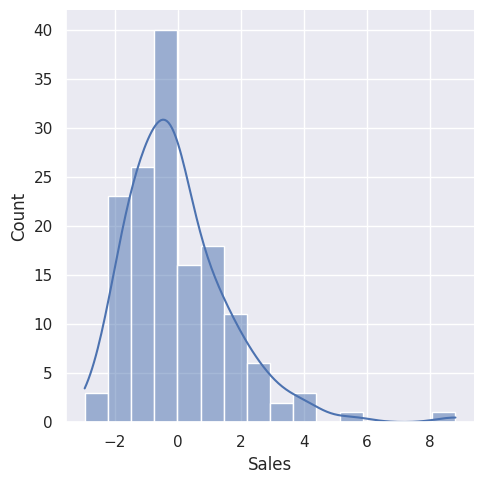

In [14]:
sns.displot(residuals_train,kde=True)
plt.show()


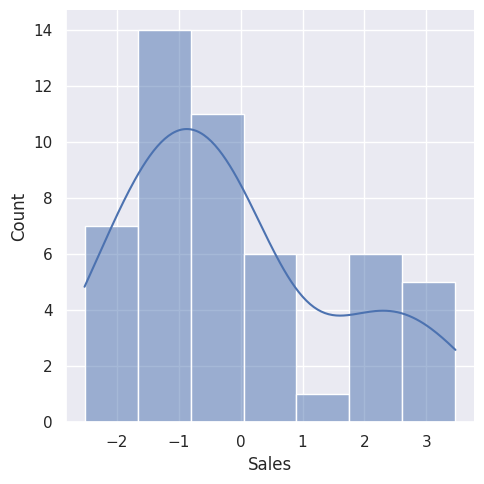

In [15]:
sns.displot(residuals_test,kde=True)
plt.show()


In [16]:
mean_residuals_train =  np.mean(residuals_train)
mean_residuals_train

1.995440849592948e-15

In [17]:
mean_residuals_test =  np.mean(residuals_test)
mean_residuals_test

-0.12408881721282064

very close to zero, all good

# 3. Homoscedasticity: Constant variance of Residuals

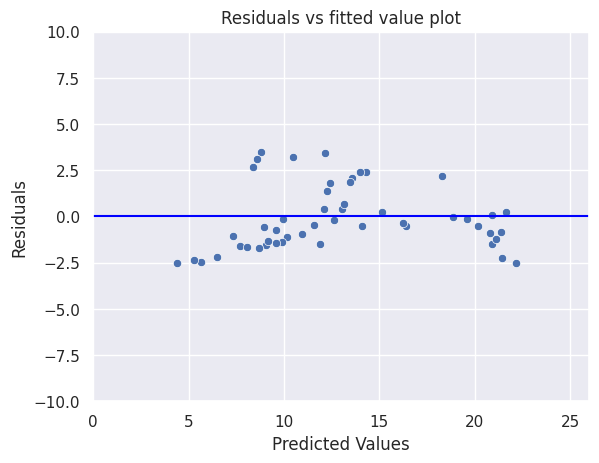

In [18]:
sns.scatterplot(x=y_pred,y=residuals_test)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
sns.lineplot(x=[0,26],y=[0,0], color='blue')
plt.title('Residuals vs fitted value plot')
plt.show()

In [19]:
# There should not be funnel or any change along the line. in the ideal case, spread relatively 0 along line

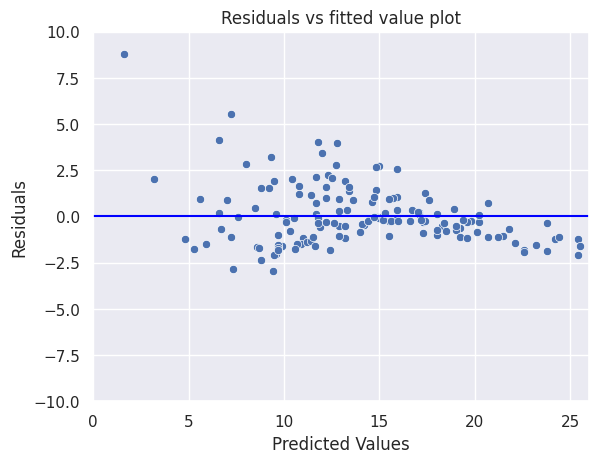

In [20]:
sns.scatterplot(x=y_train,y=residuals_train)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
sns.lineplot(x=[0,26],y=[0,0], color='blue')
plt.title('Residuals vs fitted value plot')
plt.show()

### test = Goldfeld Quandt Test
1. null hypothesis -Error terms are homo...
2. Alternate hypothesis - error terms are hetero

Homoskedastic refers to a condition in which the variance of the error term in a regression model is constant

In [21]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F-stat','p-value']
test = sms.het_goldfeldquandt(residuals_train,X_train)
lzip(name,test)

#accept the null hypothesis when pvalue >0.05
#reject when pvalue<0.05

[('F-stat', 1.1774155359126532), ('p-value', 0.2450555124784815)]

In [22]:
# p value is more than 0.05 in the test, we can't reject the null hypothesis

## 4. no autocorrelation of residuals

residuals are autocorrelated: the current value is dependant on the previous values. There is definite unexplained pattern in the Y variable, shows in the error terms as well. more evident in time series data

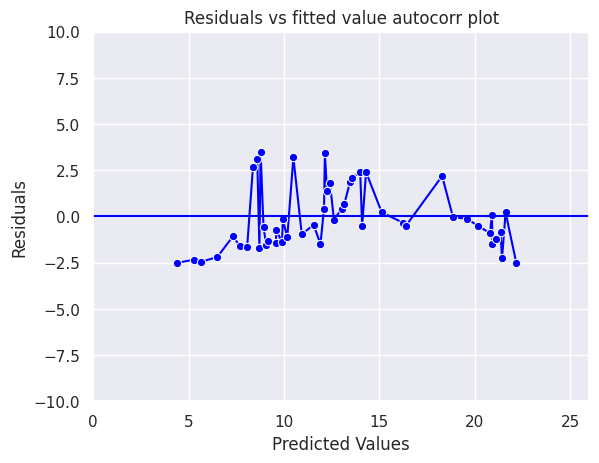

In [23]:
sns.lineplot(x=y_pred,y=residuals_test, marker='o', color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
sns.lineplot(x=[0,26],y=[0,0], color='blue')
plt.title('Residuals vs fitted value autocorr plot')
plt.show()

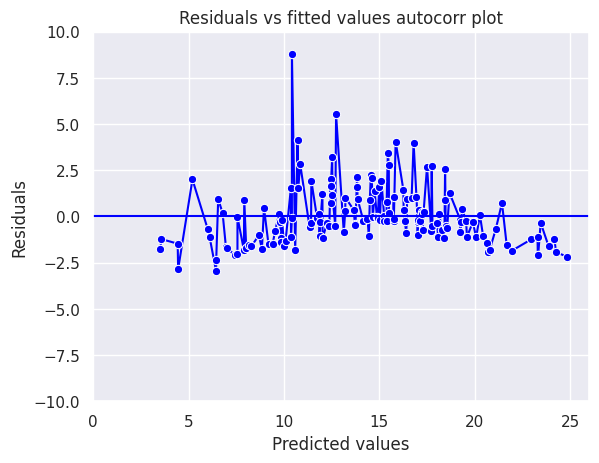

In [24]:
sns.lineplot(x=y_pred_train,y=residuals_train,marker='o',color='blue')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
sns.lineplot(x=[0,26],y=[0,0],color='blue')
plt.title('Residuals vs fitted values autocorr plot')
plt.show()


## No perfect Multicollinearity

<Axes: >

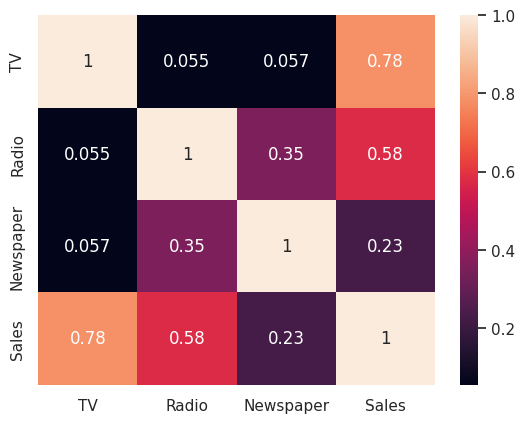

In [25]:
sns.heatmap(data.corr(),annot=True)


In [26]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
indp_vars=['TV','Radio','Newspaper']


X=data[indp_vars]
vif_data=pd.DataFrame()
vif_data['Var']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif_data)

         Var       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


vif= 1 , no multico

vif>1 increase levels of multico

vif 5 to 10 problem 10

VIFi=1/1-R2i

VIF=1/1-R2i

R2 score=1-ssr/sst

adjusted_r2 score---that accounts for the number of predictors in the model
=1-((1-R2)(n-1)/(n-k-1))


n=number of observation\
k=number of predictors(indep vars)

-infinity to +1

penalise R2 score for each additional predictor that does not significantly improve the model-

house price pred
- area,bedrooms r2 0.9 ad r2-0.9
- are, bedrooms, bathrooms r2 score-0.92, ad r2 score -0.9


In [28]:
import statsmodels.api as sm
# add a constant to get an intercept
X_train_sm=sm.add_constant(X_train)
# fit the regression line using 'OLS'
lr=sm.OLS(y_train,X_train_sm).fit()


In [29]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     422.2
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.02e-71
Time:                        15:40:57   Log-Likelihood:                -289.20
No. Observations:                 150   AIC:                             586.4
Df Residuals:                     146   BIC:                             598.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9915      0.138    101.356      0.0

only OLS can do adjusted R-Squared. Scikit learn no such method\
x1 is TV, x2 is radio, x3 is newspaper\
3rd coeff is low, less correlated with sales\
t- test for each coeff\
p indicates significance of each coeff. p should be less than 0.05\
null hypothesis, there is no significance of indep var vs dep var
alternate - there is significance\
p <0.05 reject null hypothesis\
p >0.05 null is not rejected

gives feature seclection - 50 features --predict model performance\
do this for feature selection in projects and remove variables that are not important


In [30]:
#pred
X_test_sm = sm.add_constant(X_test)
#pred the y values
y_pred = lr.predict(X_test_sm)

In [31]:
y_pred

array([16.38348211, 20.92434957, 21.61495426, 10.49069997, 22.17690456,
       13.02668085, 21.10309295,  7.31813008, 13.56732111, 15.12238649,
        8.92494113,  6.49924401, 14.30119928,  8.77233515,  9.58665483,
       12.09485291,  8.59621605, 16.25337881, 10.16948105, 18.85753401,
       19.5799036 , 13.15877029, 12.25103735, 21.35141984,  7.69607607,
        5.64686906, 20.79780073, 11.90951247,  9.06581044,  8.37295611,
       12.40815899,  9.89416076, 21.42707658, 12.14236853, 18.28776857,
       20.18114718, 13.99303029, 20.89987736, 10.9313953 ,  4.38721626,
        9.58213448, 12.6170249 ,  9.93851933,  8.06816257, 13.45497849,
        5.25769423,  9.15399537, 14.09552838,  8.71029827, 11.55102817])

more model summary than sk learn. more info\
normally will just use scikit, if we have knowledge about data\
sk learn more handy, to save models etc


#remove newspaper

In [32]:
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [44]:
X = data.iloc[:,:-2]
y= data.iloc[:,-1]

In [45]:
X

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
...,...,...
196,38.2,3.7
197,94.2,4.9
198,177.0,9.3
199,283.6,42.0


In [46]:
#apply scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [48]:
#apply lr
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [49]:
# evaluate
from sklearn.metrics import mean_squared_error, r2_score
print('mse', mean_squared_error(y_test,y_pred))
print('r2 score', r2_score(y_test,y_pred))

mse 2.853994755776103
r2 score 0.8944787062601195


In [50]:
y_pred_train = lr.predict(X_train)
print('r2 score', r2_score(y_train,y_pred_train))

r2 score 0.8965547603211033


In [51]:
import statsmodels.api as sm
# add a constant to get an intercept
X_train_sm=sm.add_constant(X_train)
# fit the regression line using 'OLS'
lr=sm.OLS(y_train,X_train_sm).fit()

In [52]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     637.0
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           3.81e-73
Time:                        16:04:49   Log-Likelihood:                -289.26
No. Observations:                 150   AIC:                             584.5
Df Residuals:                     147   BIC:                             593.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9909      0.138    101.661      0.0

Lower AIC is preferred\
Lower BIC is preferred\
Higher F-statistic, one of the variable is contributing significantly to explain the variance
